<h1 style="color:red;font-size:46px;text-align:center;">Google Maps<h1/>

<h1 align=center><font size = 6, color = blue>Exploratory Data Analysis-1</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv("../../Data Wrangling/klinik_bewertungen_google_afterWrangling.csv")
df.head(10)

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.000000,2021,1
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.000000,2020,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.000000,2021,1
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.000000,2018,4
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.000000,2021,1
5,Herzogin Elisabeth Hospital,Ich bin begeistert von der Leistung des Assist...,5,1.000000,0.000000,2021,1
6,Herzogin Elisabeth Hospital,"Eine 100%tige Empfehlung.**Tolles Personal, al...",5,0.500000,0.000000,2021,2
7,Herzogin Elisabeth Hospital,Am 20.02.2021 mit akutem Herzinfarkt puppenlus...,4,0.411111,0.111111,2021,1
8,Herzogin Elisabeth Hospital,Vor 6 Wochen Hüft Tep links bekommen. Fühlte m...,5,0.250000,0.000000,2021,1
9,Herzogin Elisabeth Hospital,Ich war heute Abend 21:30 in der Notaufnahme m...,1,0.000000,0.000000,2021,2


<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

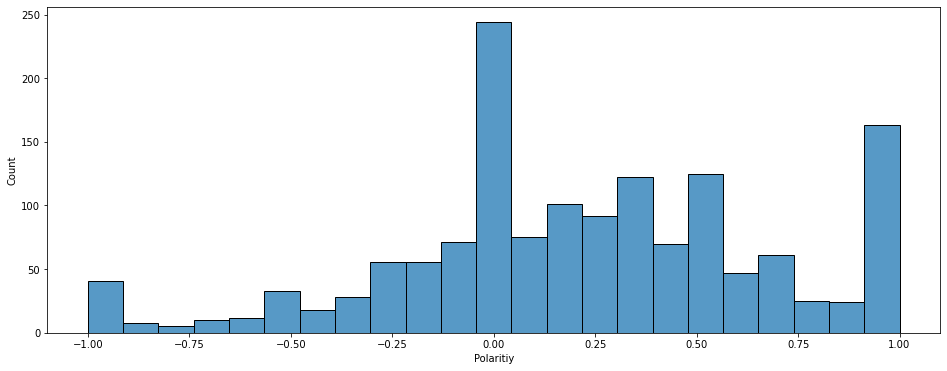

In [3]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Polaritiy"])

In [4]:
df.head(1)

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1


In [5]:
df.shape

(1487, 7)

In [6]:
df[df['Polaritiy']>=0.3].shape

(644, 7)

In [7]:
df[df['Sternebewertung']>=3].shape

(817, 7)

<AxesSubplot:xlabel='Sternebewertung', ylabel='Count'>

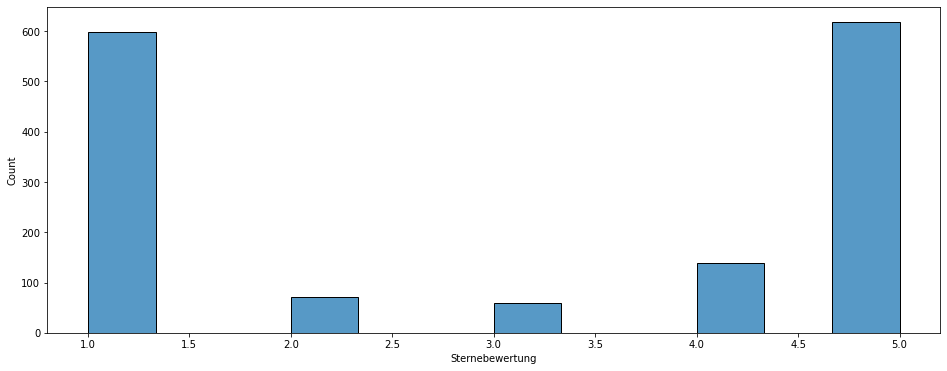

In [8]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Sternebewertung"])

In [9]:
df_sterne=df['Sternebewertung'].value_counts(sort= True).to_frame()
df_sterne

,Sternebewertung
5,618
1,598
4,139
2,72
3,60


In [10]:
Sternebewertung=[618,598,72,60,139]

In [11]:
df_sterne=df_sterne.reindex(['5', '1', '2', '3','4'])
df_sterne.Sternebewertung=Sternebewertung

In [12]:
df_sterne

,Sternebewertung
5,618
1,598
2,72
3,60
4,139


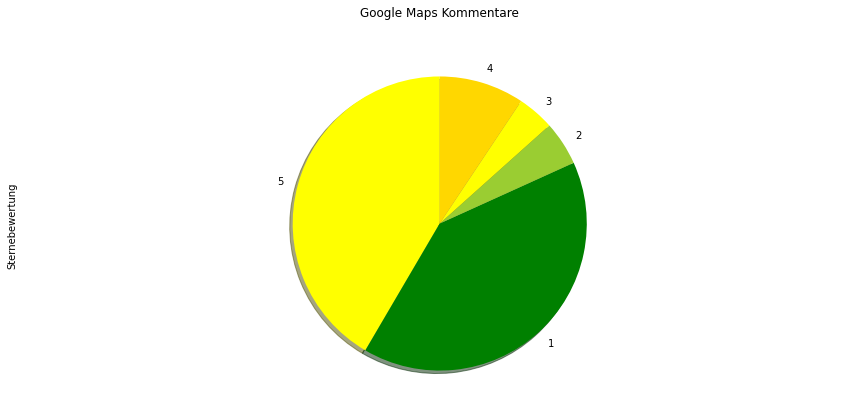

In [13]:

colors_list = ['yellow', 'green', 'yellowgreen', 'yellow', "gold"]
explode_list = [0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.

df_sterne['Sternebewertung'].plot(kind='pie',
                            figsize=(15, 6),
                             
                            startangle=90,    
                            shadow=True,       
                                     # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Google Maps Kommentare', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_gesamt.index, loc='upper left') 

plt.show()

In [14]:
gleich=0
for i in range(df.shape[0]):
    if ((df.Polaritiy[i]>=0.3 and df.Sternebewertung[i]>2.5) or (df.Polaritiy[i]<=0.3 and df.Sternebewertung[i]<2.5)):
        gleich+=1  
print('gleich: ', gleich)
print(gleich/df.shape[0])

gleich:  1177
0.7915265635507733


In [15]:
positive=[]
for i in range(df.shape[0]):
    if (df.Polaritiy[i]>=0.3):
        positive.append(1)
    else:
        positive.append(0)

In [16]:
df["positive"]=positive
df

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0
...,...,...,...,...,...,...,...,...
1482,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1
1483,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0
1484,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0
1485,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0


In [17]:
df.to_csv('klinik_bewertungen_google_afterAnalysis.csv', index=False)

In [18]:
df[df['positive']==1].shape

(644, 8)

In [19]:
df[df['positive']==0].shape

(843, 8)

In [20]:
df = pd.read_csv("klinik_bewertungen_google_afterAnalysis.csv")
df[df['positive']==1].shape

(644, 8)

<AxesSubplot:xlabel='positive', ylabel='Count'>

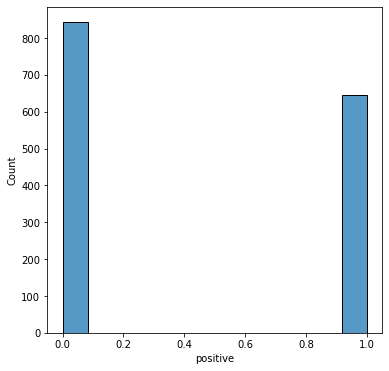

In [21]:
plt.figure(figsize=(6, 6))
sns.histplot(df["positive"])

In [22]:
df_positive=df['positive'].value_counts().to_frame()
df_positive.index=["negative","positive"]
df_positive

,positive
negative,843
positive,644


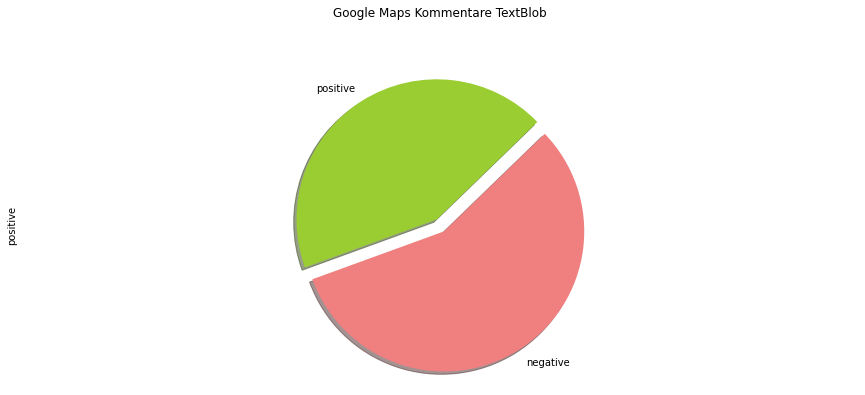

In [63]:

colors_list = ['lightcoral','yellowgreen']
explode_list = [0, 0.1] # ratio for each continent with which to offset each wedge.

df_positive['positive'].plot(kind='pie',
                            figsize=(15, 6),
                             
                            startangle=200,    
                            shadow=True,       
                                     # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Google Maps Kommentare TextBlob', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_gesamt.index, loc='upper left') 

plt.show()

In [24]:
df.columns

Index(['Name der Klinik', 'Textuelle Bewertung', 'Sternebewertung',
       'Polaritiy', 'Subjectivity', 'year', 'Likes', 'positive'],
      dtype='object')

In [25]:
df.head()

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0


<h2>Analyzing Individual Feature Patterns using Visualization</h2>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [27]:
df.describe()

,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,3.071957,0.218414,0.058178,2019.221923,3.357095,0.433087
std,1.846626,0.462307,0.135910,1.423880,4.178663,0.495669
min,1.000000,-1.000000,0.000000,2013.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
50%,4.000000,0.200000,0.000000,2020.000000,2.000000,0.000000
75%,5.000000,0.500000,0.057190,2020.000000,5.000000,1.000000
max,5.000000,1.000000,1.000000,2021.000000,38.000000,1.000000


In [28]:
df.corr()

,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive
Sternebewertung,1.000000,0.639054,-0.039841,0.010302,-0.088013,0.633499
Polaritiy,0.639054,1.000000,-0.083485,-0.016189,-0.084875,0.788399
Subjectivity,-0.039841,-0.083485,1.000000,0.015685,0.032182,-0.080612
year,0.010302,-0.016189,0.015685,1.000000,0.164016,0.014380
Likes,-0.088013,-0.084875,0.032182,0.164016,1.000000,-0.042227
positive,0.633499,0.788399,-0.080612,0.014380,-0.042227,1.000000


In [29]:
df[['Polaritiy', 'Sternebewertung',"positive"]].corr()  

,Polaritiy,Sternebewertung,positive
Polaritiy,1.000000,0.639054,0.788399
Sternebewertung,0.639054,1.000000,0.633499
positive,0.788399,0.633499,1.000000


In [30]:
df.columns

Index(['Name der Klinik', 'Textuelle Bewertung', 'Sternebewertung',
       'Polaritiy', 'Subjectivity', 'year', 'Likes', 'positive'],
      dtype='object')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='positive', ylabel='Density'>

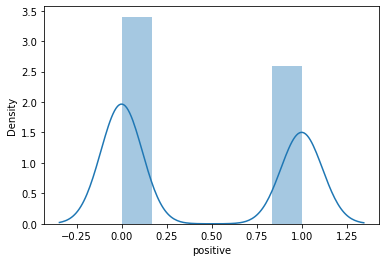

In [31]:
sns.distplot(df["positive"])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polaritiy', ylabel='Density'>

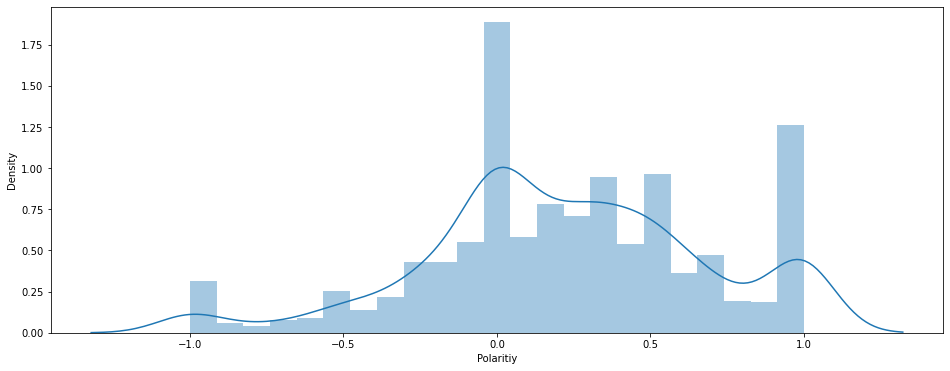

In [32]:
plt.figure(figsize=(16, 6))
sns.distplot(df["Polaritiy"])

<AxesSubplot:xlabel='Polaritiy', ylabel='Density'>

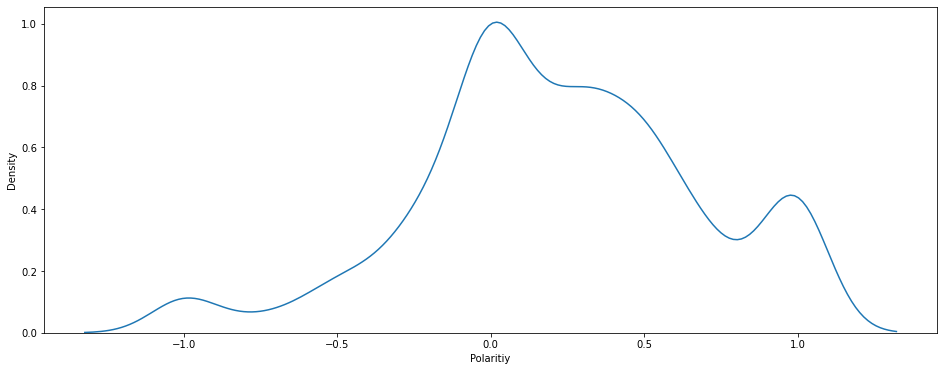

In [33]:
plt.figure(figsize=(16, 6))
sns.kdeplot(df["Polaritiy"])

<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

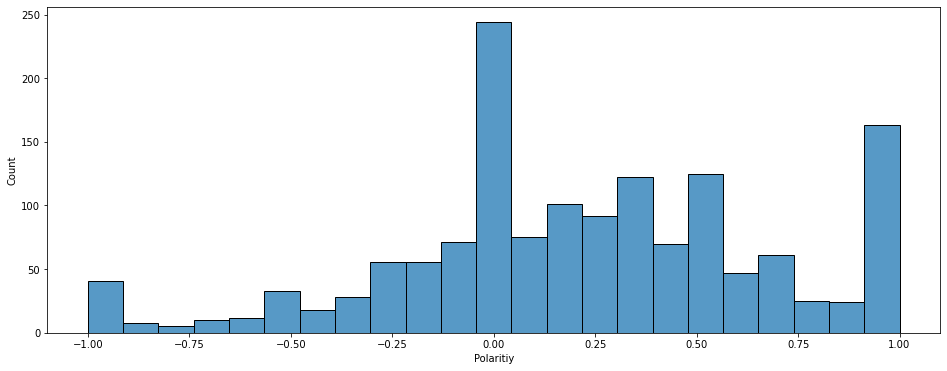

In [34]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Polaritiy"])

<AxesSubplot:xlabel='Subjectivity', ylabel='Count'>

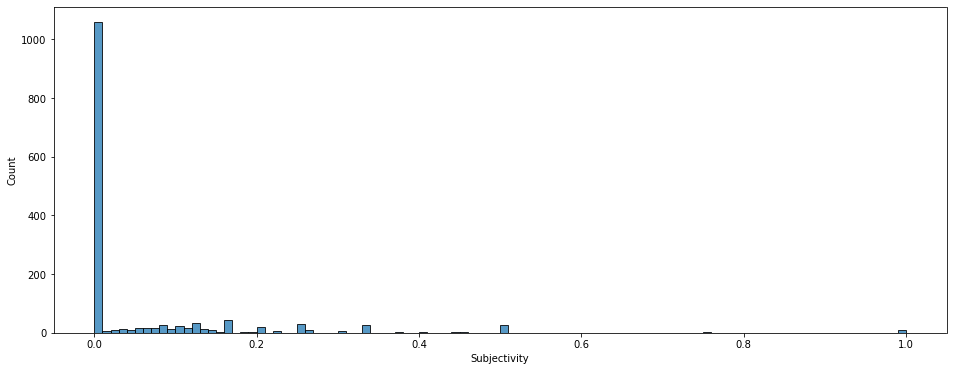

In [35]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Subjectivity"])

In [36]:
dff=df[df["Polaritiy"]>=0.1]
dff.shape

(854, 8)

In [37]:
dff=df[df["Sternebewertung"]>=2.5]
dff.shape

(817, 8)

<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

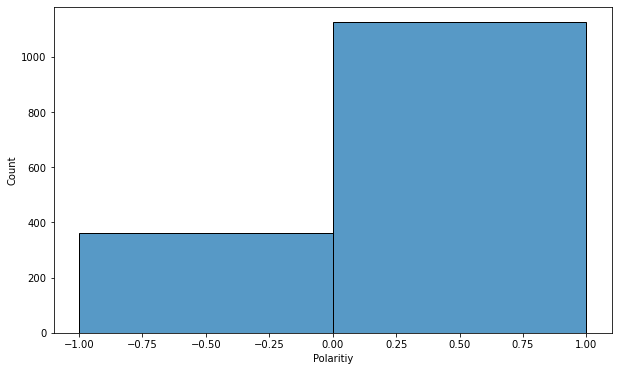

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Polaritiy"],bins=2)

<AxesSubplot:xlabel='Sternebewertung', ylabel='Count'>

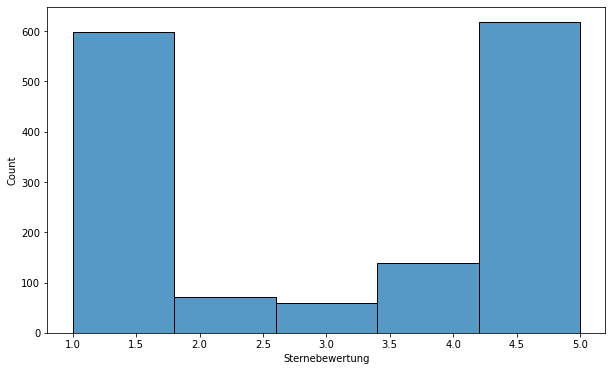

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Sternebewertung"],bins=5)

<AxesSubplot:xlabel='Subjectivity', ylabel='Count'>

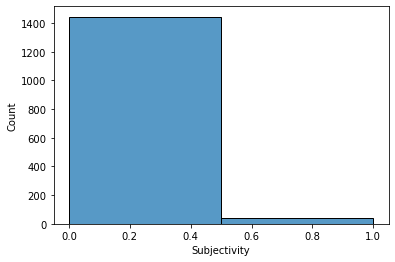

In [40]:
sns.histplot(df["Subjectivity"],bins=2)

<AxesSubplot:xlabel='Sternebewertung', ylabel='Count'>

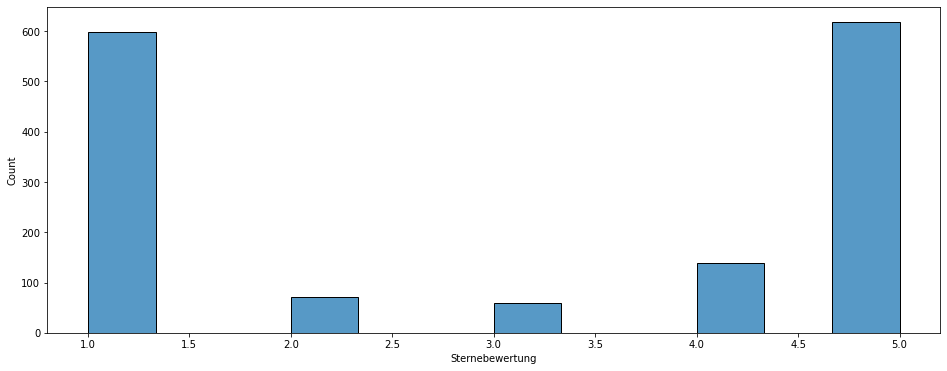

In [41]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Sternebewertung"])

<AxesSubplot:xlabel='Sternebewertung', ylabel='Density'>

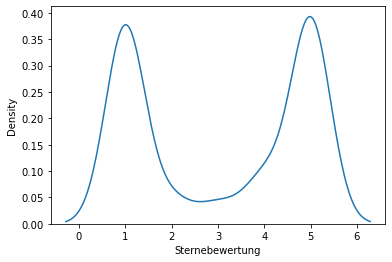

In [42]:
sns.kdeplot(df["Sternebewertung"])

<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

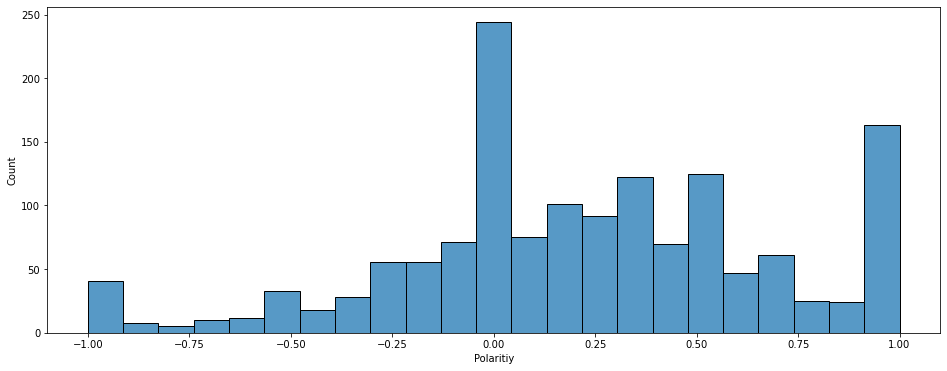

In [43]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Polaritiy"])

<AxesSubplot:xlabel='Sternebewertung', ylabel='Count'>

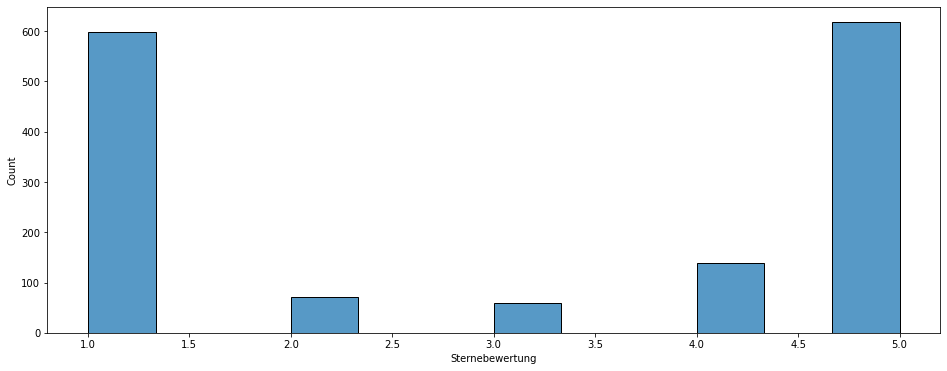

In [44]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Sternebewertung"])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sternebewertung', ylabel='Density'>

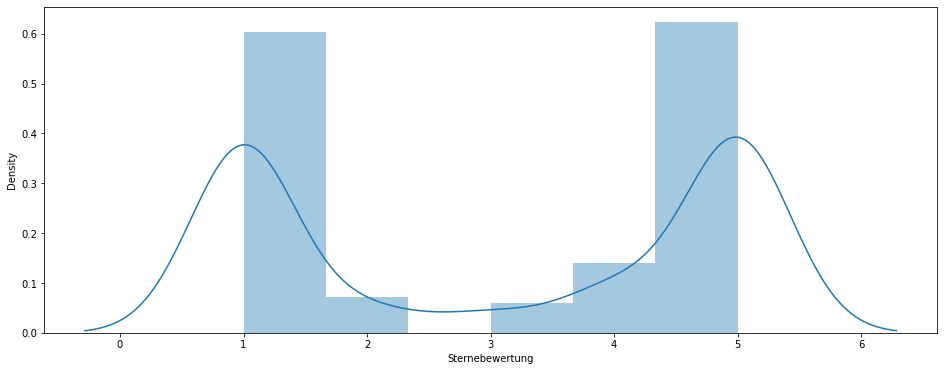

In [45]:
plt.figure(figsize=(16, 6))
sns.distplot(df["Sternebewertung"])

In [46]:
df.columns

Index(['Name der Klinik', 'Textuelle Bewertung', 'Sternebewertung',
       'Polaritiy', 'Subjectivity', 'year', 'Likes', 'positive'],
      dtype='object')

In [47]:
df[['Polaritiy','Sternebewertung','positive']].describe()

,Polaritiy,Sternebewertung,positive
count,1487.000000,1487.000000,1487.000000
mean,0.218414,3.071957,0.433087
std,0.462307,1.846626,0.495669
min,-1.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.200000,4.000000,0.000000
75%,0.500000,5.000000,1.000000
max,1.000000,5.000000,1.000000


In [48]:
df[["Name der Klinik","Textuelle Bewertung"]].describe(include=['object'])

,Name der Klinik,Textuelle Bewertung
count,1487,1487
unique,17,1485
top,Klinikum Wolfsburg in Wolfsburg,Viel zu lange Wartezeit und unfreundlicher Umg...
freq,164,2


In [49]:
df['Sternebewertung'].value_counts().to_frame()

,Sternebewertung
5,618
1,598
4,139
2,72
3,60


End...